**Question 3**



What factors have a greater effect on happiness in developing vs developed countries?

Importing Libraries

In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing the Countries dataset and the happiness in 2019 dataset

In [263]:
integrated_happiness_df = pd.read_csv("Integrated_Happiness (3).csv")
life_expectancy_df = pd.read_csv("Life Expectancy Data.csv")

In [264]:
integrated_happiness_df

,Unnamed: 0,Region,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Trust (Government Corruption),Generosity,Cluster,Year
0,0,Western Europe,Switzerland,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.0,2015
1,1,Western Europe,Iceland,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.0,2015
2,2,Western Europe,Denmark,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.0,2015
3,3,Western Europe,Norway,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.0,2015
4,4,North America,Canada,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,144,Middle East and Northern Africa,Yemen,151.0,3.380,0.28700,1.16300,0.46300,0.14300,0.07700,0.10800,0.0,2019
759,145,Sub-Saharan Africa,Rwanda,152.0,3.334,0.35900,0.71100,0.61400,0.55500,0.17200,0.21700,0.0,2019
760,146,Sub-Saharan Africa,Tanzania,153.0,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,0.0,2019
761,147,Southern Asia,Afghanistan,154.0,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,0.0,2019


In [265]:
life_expectancy_df

,Unnamed: 0,Country,Year,Status,percentage expenditure,HIV/AIDS Deaths,Disease,Life expectancy,Adult Mortality,Income composition of resources,Schooling,Immunization coverage,GDP
0,0,Afghanistan,2015,Developing,71.279624,0.1,Hepatitis B,65.0,263.0,0.479,10.1,65.0,584.259210
1,1,Afghanistan,2014,Developing,73.523582,0.1,Hepatitis B,59.9,271.0,0.476,10.0,62.0,612.696514
2,2,Afghanistan,2013,Developing,73.219243,0.1,Hepatitis B,59.9,268.0,0.470,9.9,64.0,631.744976
3,3,Afghanistan,2012,Developing,78.184215,0.1,Hepatitis B,59.5,272.0,0.463,9.8,67.0,669.959000
4,4,Afghanistan,2011,Developing,7.097109,0.1,Hepatitis B,59.2,275.0,0.454,9.5,68.0,63.537231
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8809,8681,United States of America,2004,Developed,0.000000,0.1,Diphtheria,77.5,111.0,0.862,15.8,96.0,13832.755400
8810,8682,United States of America,2003,Developed,0.000000,0.1,Diphtheria,77.2,114.0,0.862,15.8,96.0,13832.755400
8811,8683,United States of America,2002,Developed,0.000000,0.1,Diphtheria,77.0,115.0,0.862,15.8,94.0,13832.755400
8812,8684,United States of America,2001,Developed,0.000000,0.1,Diphtheria,76.9,115.0,0.862,15.8,94.0,13832.755400


In [266]:
life_expectancy_df = life_expectancy_df[['Country', 'Status']]

In [267]:
life_expectancy_df = life_expectancy_df.drop_duplicates()
life_expectancy_df = life_expectancy_df.reset_index()
life_expectancy_df = life_expectancy_df.drop( columns = ['index'], axis = 1)
life_expectancy_df

,Country,Status
0,Afghanistan,Developing
1,Albania,Developing
2,Algeria,Developing
3,Angola,Developing
4,Antigua and Barbuda,Developing
...,...,...
188,Spain,Developed
189,Sweden,Developed
190,Switzerland,Developed
191,United Kingdom of Great Britain and Northern I...,Developed


In [268]:
integrated_happiness_df = integrated_happiness_df.drop(columns = ['Unnamed: 0'] , axis = 1)

In [269]:
integrated_happiness_df

,Region,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Trust (Government Corruption),Generosity,Cluster,Year
0,Western Europe,Switzerland,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.0,2015
1,Western Europe,Iceland,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.0,2015
2,Western Europe,Denmark,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.0,2015
3,Western Europe,Norway,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.0,2015
4,North America,Canada,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
758,Middle East and Northern Africa,Yemen,151.0,3.380,0.28700,1.16300,0.46300,0.14300,0.07700,0.10800,0.0,2019
759,Sub-Saharan Africa,Rwanda,152.0,3.334,0.35900,0.71100,0.61400,0.55500,0.17200,0.21700,0.0,2019
760,Sub-Saharan Africa,Tanzania,153.0,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,0.0,2019
761,Southern Asia,Afghanistan,154.0,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,0.0,2019


In [270]:
merged_happiness_life = pd.merge(integrated_happiness_df, life_expectancy_df,left_on="Country", right_on="Country", how='left')

In [271]:
merged_happiness_life.isnull().sum()

Region                             0
Country                            0
Happiness Rank                     0
Happiness Score                    0
Economy (GDP per Capita)           0
Social support                     0
Healthy life expectancy            0
Freedom to make life choices       0
Trust (Government Corruption)      0
Generosity                         0
Cluster                            0
Year                               0
Status                           107
dtype: int64

In [272]:
# merged_happiness_life.isnull()
status_nulls=merged_happiness_life[merged_happiness_life['Status'].isnull()]
status_nulls['Country'].unique()

array(['United States', 'United Kingdom', 'Venezuela', 'Czech Republic',
       'Taiwan', 'South Korea', 'Bolivia', 'Moldova', 'Russia',
       'North Cyprus', 'Kosovo', 'Hong Kong', 'Vietnam',
       'Somaliland region', 'Macedonia', 'Laos',
       'Palestinian Territories', 'Iran', 'Congo (Kinshasa)',
       'Congo (Brazzaville)', 'Tanzania', 'Ivory Coast', 'Syria',
       'Puerto Rico', 'Somaliland Region'], dtype=object)

In [273]:
countries = status_nulls['Country']
countries = countries.drop_duplicates()
countries = countries.reset_index()
countries

,index,Country
0,14,United States
1,20,United Kingdom
2,22,Venezuela
3,30,Czech Republic
4,37,Taiwan
5,46,South Korea
6,50,Bolivia
7,51,Moldova
8,63,Russia
9,65,North Cyprus


In [274]:
len(status_nulls['Country'].unique())

25

In [275]:
non_developed = status_nulls.loc[status_nulls['Country'] == "Venezuela"]
non_developed = non_developed.append(status_nulls.loc[status_nulls['Country'] == "Bolivia"])
non_developed = non_developed.append(status_nulls.loc[status_nulls['Country'] == "Vietnam"])
non_developed = non_developed.append(status_nulls.loc[status_nulls['Country'] == "Somaliland region"])
non_developed = non_developed.append(status_nulls.loc[status_nulls['Country'] == "Macedonia"])
non_developed = non_developed.append(status_nulls.loc[status_nulls['Country'] == "Laos"])
non_developed = non_developed.append(status_nulls.loc[status_nulls['Country'] == "Palestinian Territories"])
non_developed = non_developed.append(status_nulls.loc[status_nulls['Country'] == "Congo (Kinshasa)"])
non_developed = non_developed.append(status_nulls.loc[status_nulls['Country'] == "Congo (Brazzaville)"])
non_developed = non_developed.append(status_nulls.loc[status_nulls['Country'] == "Ivory Coast"])
non_developed = non_developed.append(status_nulls.loc[status_nulls['Country'] == "Tanzania"])
non_developed = non_developed.append(status_nulls.loc[status_nulls['Country'] == "Syria"])
non_developed = non_developed.append(status_nulls.loc[status_nulls['Country'] == "Somaliland Region"])
non_developed.replace(np.nan,"Developing" , inplace=True)
non_developed = non_developed.reset_index()
non_developed

,index,Region,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Trust (Government Corruption),Generosity,Cluster,Year,Status
0,22,Latin America and Caribbean,Venezuela,23.0,6.810,1.044240,1.255960,0.720520,0.429080,0.110690,0.058410,2.0,2015,Developing
1,201,Latin America and Caribbean,Venezuela,44.0,6.084,1.133670,1.033020,0.619040,0.198470,0.083040,0.042500,1.0,2016,Developing
2,393,Latin America and Caribbean,Venezuela,82.0,5.250,1.128431,1.431338,0.617144,0.153997,0.064491,0.065020,0.0,2017,Developing
3,561,Latin America and Caribbean,Venezuela,102.0,4.806,0.996000,1.469000,0.657000,0.133000,0.052000,0.056000,0.0,2018,Developing
4,718,Latin America and Caribbean,Venezuela,108.0,4.707,0.960000,1.427000,0.805000,0.154000,0.047000,0.064000,0.0,2019,Developing
5,50,Latin America and Caribbean,Bolivia,51.0,5.890,0.681330,0.978410,0.539200,0.574140,0.088000,0.205360,1.0,2015,Developing
6,216,Latin America and Caribbean,Bolivia,59.0,5.822,0.794220,0.837790,0.469700,0.509610,0.077460,0.216980,1.0,2016,Developing
7,370,Latin America and Caribbean,Bolivia,58.0,5.823,0.833757,1.227619,0.473630,0.558733,0.060478,0.225561,0.0,2017,Developing
8,522,Latin America and Caribbean,Bolivia,62.0,5.752,0.751000,1.223000,0.508000,0.606000,0.054000,0.141000,0.0,2018,Developing
9,673,Latin America and Caribbean,Bolivia,61.0,5.779,0.776000,1.209000,0.706000,0.511000,0.064000,0.137000,1.0,2019,Developing


In [276]:
developed = status_nulls.loc[status_nulls['Country'] == "United States"]
developed = developed.append(status_nulls.loc[status_nulls['Country'] == "United Kingdom"])
developed = developed.append(status_nulls.loc[status_nulls['Country'] == "Czech Republic"])
developed = developed.append(status_nulls.loc[status_nulls['Country'] == "South Korea"])
developed = developed.append(status_nulls.loc[status_nulls['Country'] == "United Kingdom"])
developed = developed.append(status_nulls.loc[status_nulls['Country'] == "Russia"])
developed = developed.append(status_nulls.loc[status_nulls['Country'] == "North Cyprus"])
developed = developed.append(status_nulls.loc[status_nulls['Country'] == "Kosovo"])
developed = developed.append(status_nulls.loc[status_nulls['Country'] == "Hong Kong"])
developed = developed.append(status_nulls.loc[status_nulls['Country'] == "Iran"])
developed = developed.append(status_nulls.loc[status_nulls['Country'] == "Puerto Rico"])
developed = developed.append(status_nulls.loc[status_nulls['Country'] == "Taiwan"])
developed.replace(np.nan,"Developed" , inplace=True)
developed = developed.reset_index()
developed

,index,Region,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Trust (Government Corruption),Generosity,Cluster,Year,Status
0,14,North America,United States,15.0,7.119,1.394510,1.247110,0.861790,0.546040,0.158900,0.401050,2.0,2015,Developed
1,170,North America,United States,13.0,7.104,1.507960,1.047820,0.779000,0.481630,0.148680,0.410770,2.0,2016,Developed
2,328,North America,United States,14.0,6.993,1.546259,1.419921,0.774287,0.505741,0.135639,0.392579,2.0,2017,Developed
3,481,North America,United States,18.0,6.886,1.398000,1.471000,0.819000,0.547000,0.133000,0.291000,2.0,2018,Developed
4,632,North America,United States,19.0,6.892,1.433000,1.457000,0.874000,0.454000,0.128000,0.280000,2.0,2019,Developed
5,20,Western Europe,United Kingdom,21.0,6.867,1.266370,1.285480,0.909430,0.596250,0.320670,0.519120,2.0,2015,Developed
6,180,Western Europe,United Kingdom,23.0,6.725,1.402830,1.086720,0.809910,0.500360,0.273990,0.501560,2.0,2016,Developed
7,333,Western Europe,United Kingdom,19.0,6.714,1.441634,1.496460,0.805336,0.508190,0.265428,0.492774,2.0,2017,Developed
8,474,Western Europe,United Kingdom,11.0,7.190,1.244000,1.433000,0.888000,0.464000,0.082000,0.262000,2.0,2018,Developed
9,628,Western Europe,United Kingdom,15.0,7.054,1.333000,1.538000,0.996000,0.450000,0.278000,0.348000,2.0,2019,Developed


In [277]:
developed_and_non_developed = developed
developed_and_non_developed = developed_and_non_developed.append(non_developed)
developed_and_non_developed = developed_and_non_developed.reset_index()
developed_and_non_developed = developed_and_non_developed.drop(columns = ["level_0", "index"], axis = 1)
developed_and_non_developed

,Region,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Trust (Government Corruption),Generosity,Cluster,Year,Status
0,North America,United States,15.0,7.119,1.394510,1.247110,0.861790,0.546040,0.158900,0.401050,2.0,2015,Developed
1,North America,United States,13.0,7.104,1.507960,1.047820,0.779000,0.481630,0.148680,0.410770,2.0,2016,Developed
2,North America,United States,14.0,6.993,1.546259,1.419921,0.774287,0.505741,0.135639,0.392579,2.0,2017,Developed
3,North America,United States,18.0,6.886,1.398000,1.471000,0.819000,0.547000,0.133000,0.291000,2.0,2018,Developed
4,North America,United States,19.0,6.892,1.433000,1.457000,0.874000,0.454000,0.128000,0.280000,2.0,2019,Developed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,Middle East and Northern Africa,Syria,156.0,3.069,0.747190,0.148660,0.629940,0.069120,0.172330,0.312680,0.0,2016,Developing
103,Middle East and Northern Africa,Syria,152.0,3.462,0.777153,0.396103,0.500533,0.081539,0.151347,0.385923,1.0,2017,Developing
104,Middle East and Northern Africa,Syria,150.0,3.462,0.689000,0.382000,0.539000,0.088000,0.144000,0.302000,1.0,2018,Developing
105,Middle East and Northern Africa,Syria,149.0,3.462,0.619000,0.378000,0.440000,0.013000,0.141000,0.331000,0.0,2019,Developing


In [278]:
for index, row in countries.iterrows():
  merged_happiness_life = merged_happiness_life[merged_happiness_life["Country"] != row["Country"]]

In [279]:
merged_happiness_life = merged_happiness_life.append(developed_and_non_developed)
merged_happiness_life = merged_happiness_life.reset_index()

In [280]:
merged_happiness_life.isnull().sum()

index                            0
Region                           0
Country                          0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Social support                   0
Healthy life expectancy          0
Freedom to make life choices     0
Trust (Government Corruption)    0
Generosity                       0
Cluster                          0
Year                             0
Status                           0
dtype: int64

In [281]:
merged_happiness_life

,index,Region,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Trust (Government Corruption),Generosity,Cluster,Year,Status
0,0,Western Europe,Switzerland,1.0,7.587,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2.0,2015,Developed
1,1,Western Europe,Iceland,2.0,7.561,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,2.0,2015,Developed
2,2,Western Europe,Denmark,3.0,7.527,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,2.0,2015,Developed
3,3,Western Europe,Norway,4.0,7.522,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,2.0,2015,Developed
4,4,North America,Canada,5.0,7.427,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110,2.0,2015,Developed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,102,Middle East and Northern Africa,Syria,156.0,3.069,0.747190,0.148660,0.629940,0.069120,0.172330,0.312680,0.0,2016,Developing
759,103,Middle East and Northern Africa,Syria,152.0,3.462,0.777153,0.396103,0.500533,0.081539,0.151347,0.385923,1.0,2017,Developing
760,104,Middle East and Northern Africa,Syria,150.0,3.462,0.689000,0.382000,0.539000,0.088000,0.144000,0.302000,1.0,2018,Developing
761,105,Middle East and Northern Africa,Syria,149.0,3.462,0.619000,0.378000,0.440000,0.013000,0.141000,0.331000,0.0,2019,Developing


In [282]:
developed_merged = merged_happiness_life[merged_happiness_life["Status"] == "Developed"]
developed_merged_2015 = developed_merged[developed_merged["Year"] == 2015]
developed_merged_2016 = developed_merged[developed_merged["Year"] == 2016]
developed_merged_2017 = developed_merged[developed_merged["Year"] == 2017]
developed_merged_2018 = developed_merged[developed_merged["Year"] == 2018]
developed_merged_2019 = developed_merged[developed_merged["Year"] == 2019]

developing_merged = merged_happiness_life[merged_happiness_life["Status"] == "Developing"]
developing_merged_2015 = developing_merged[developing_merged["Year"] == 2015]
developing_merged_2016 = developing_merged[developing_merged["Year"] == 2016]
developing_merged_2017 = developing_merged[developing_merged["Year"] == 2017]
developing_merged_2018 = developing_merged[developing_merged["Year"] == 2018]
developing_merged_2019 = developing_merged[developing_merged["Year"] == 2019]


In [283]:
economy_gdp_developed = [developed_merged_2015["Economy (GDP per Capita)"].mean(),developed_merged_2016["Economy (GDP per Capita)"].mean(),developed_merged_2017["Economy (GDP per Capita)"].mean(),developed_merged_2018["Economy (GDP per Capita)"].mean(),developed_merged_2019["Economy (GDP per Capita)"].mean()]
social_support_developed = [developed_merged_2015["Social support"].mean(),developed_merged_2016["Social support"].mean(),developed_merged_2017["Social support"].mean(),developed_merged_2018["Social support"].mean(),developed_merged_2019["Social support"].mean()]
healthy_life_developed = [developed_merged_2015["Healthy life expectancy"].mean(),developed_merged_2016["Healthy life expectancy"].mean(),developed_merged_2017["Healthy life expectancy"].mean(),developed_merged_2018["Healthy life expectancy"].mean(),developed_merged_2019["Healthy life expectancy"].mean()]
freedom_life_choices_developed = [developed_merged_2015["Freedom to make life choices"].mean(),developed_merged_2016["Freedom to make life choices"].mean(),developed_merged_2017["Freedom to make life choices"].mean(),developed_merged_2018["Freedom to make life choices"].mean(),developed_merged_2019["Freedom to make life choices"].mean()]
trust_developed = [developed_merged_2015["Trust (Government Corruption)"].mean(),developed_merged_2016["Trust (Government Corruption)"].mean(),developed_merged_2017["Trust (Government Corruption)"].mean(),developed_merged_2018["Trust (Government Corruption)"].mean(),developed_merged_2019["Trust (Government Corruption)"].mean()]
generosity_developed = [developed_merged_2015["Generosity"].mean(),developed_merged_2016["Generosity"].mean(),developed_merged_2017["Generosity"].mean(),developed_merged_2018["Generosity"].mean(),developed_merged_2019["Generosity"].mean()]

In [311]:
social_support_developed

[1.1769966666666662,
 0.9835006976744187,
 1.3929977223277081,
 1.4372439024390244,
 1.436853658536585]

In [324]:
freedom_life_choices_developed

[0.4849742857142858,
 0.41839906976744173,
 0.45961083341389897,
 0.5112439024390242,
 0.4387560975609757]

In [325]:
freedom_life_choices_non_developed

[0.4192911206896554,
 0.35867763157894733,
 0.39060014587989367,
 0.4367706422018347,
 0.37827777777777777]

In [285]:
economy_gdp_non_developed = [developing_merged_2015["Economy (GDP per Capita)"].mean(),developing_merged_2016["Economy (GDP per Capita)"].mean(),developing_merged_2017["Economy (GDP per Capita)"].mean(),developing_merged_2018["Economy (GDP per Capita)"].mean(),developing_merged_2019["Economy (GDP per Capita)"].mean()]
social_support_non_developed = [developing_merged_2015["Social support"].mean(),developing_merged_2016["Social support"].mean(),developing_merged_2017["Social support"].mean(),developing_merged_2018["Social support"].mean(),developing_merged_2019["Social support"].mean()]
healthy_life_non_developed = [developing_merged_2015["Healthy life expectancy"].mean(),developing_merged_2016["Healthy life expectancy"].mean(),developing_merged_2017["Healthy life expectancy"].mean(),developing_merged_2018["Healthy life expectancy"].mean(),developing_merged_2019["Healthy life expectancy"].mean()]
freedom_life_choices_non_developed = [developing_merged_2015["Freedom to make life choices"].mean(),developing_merged_2016["Freedom to make life choices"].mean(),developing_merged_2017["Freedom to make life choices"].mean(),developing_merged_2018["Freedom to make life choices"].mean(),developing_merged_2019["Freedom to make life choices"].mean()]
trust_non_developed = [developing_merged_2015["Trust (Government Corruption)"].mean(),developing_merged_2016["Trust (Government Corruption)"].mean(),developing_merged_2017["Trust (Government Corruption)"].mean(),developing_merged_2018["Trust (Government Corruption)"].mean(),developing_merged_2019["Trust (Government Corruption)"].mean()]
generosity_non_developed = [developing_merged_2015["Generosity"].mean(),developing_merged_2016["Generosity"].mean(),developing_merged_2017["Generosity"].mean(),developing_merged_2018["Generosity"].mean(),developing_merged_2019["Generosity"].mean()]

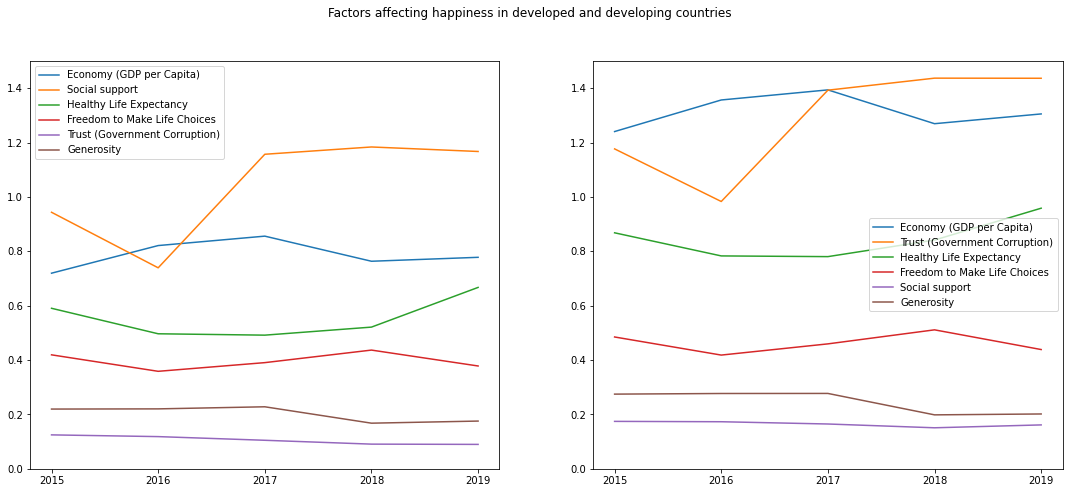

In [343]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18.5, 7.5)
ax1.plot(["2015", "2016", "2017", "2018", "2019"], economy_gdp_non_developed, label ="Economy (GDP per Capita)")
ax1.plot(["2015", "2016", "2017", "2018", "2019"], social_support_non_developed, label ="Social support")
ax1.plot(["2015", "2016", "2017", "2018", "2019"], healthy_life_non_developed, label ="Healthy Life Expectancy")
ax1.plot(["2015", "2016", "2017", "2018", "2019"], freedom_life_choices_non_developed, label ="Freedom to Make Life Choices")
ax1.plot(["2015", "2016", "2017", "2018", "2019"], trust_non_developed, label ="Trust (Government Corruption)")
ax1.plot(["2015", "2016", "2017", "2018", "2019"], generosity_non_developed, label ="Generosity")

ax2.plot(["2015", "2016", "2017", "2018", "2019"], economy_gdp_developed, label ="Economy (GDP per Capita)")
ax2.plot(["2015", "2016", "2017", "2018", "2019"], social_support_developed, label ="Trust (Government Corruption)")
ax2.plot(["2015", "2016", "2017", "2018", "2019"], healthy_life_developed, label ="Healthy Life Expectancy")
ax2.plot(["2015", "2016", "2017", "2018", "2019"], freedom_life_choices_developed, label ="Freedom to Make Life Choices")
ax2.plot(["2015", "2016", "2017", "2018", "2019"], trust_developed, label ="Social support")
ax2.plot(["2015", "2016", "2017", "2018", "2019"], generosity_developed, label ="Generosity")
fig.suptitle('Factors affecting happiness in developing and developed countries')
ax1.set_ylim(0, 1.5)
ax2.set_ylim(0, 1.5)
leg = ax1.legend()
leg2 = ax2.legend()


As we see in the above graph which illustrates the relation between each factor and the happiness along the years, in the developing countries the economy had been increasing in its effect since 2015 to 2017 as the countries economies were growing massively and that helped people and affected their happiness positively but after 2017 it started decaying in its effect as the economy of the developed countries started to stabilize more and people no longer were affected as they got used to the current level they reached and starting 2018 till now it has become a constant effect on people's happiness.
While in the developed countries the same process happened in increasing and decreasing throughout the years in the developing countries but it has a low effect on people's happiness compared to the developing countries

Regarding the Trust (Government Corruption), in the developing countries,the effect of the trust has been low on the people's happiness and also it was constant and that makes sense as these countries doesn't have that much of corruption. While in the developed countries, its effect on the people's happiness was decreasing in 2015. But in 2016 its effect increased on a high scale which calls for an investigation to know what happened in that year in those developed countries but after 2016 it started gain a constant effect on the happiness.

Moving on to the healthy life expectancy which decreased in its effect in 2015 but after that it had a constant effect till 2018. After that it started increasing in its effect till now  in both developing and developed countries although its effect on the developed countries is more than the developing countries.

Regarding the freedom to make life choices it has been increasing and decreasing every year with the same factor so it has somehow a constant effect even though its effect on the developed countries is more than the developing countries.

Generosity appear to have had a constant effect throughout the years although the social support decreased in 2018 which is an interesting fact and can be looked up to know what happened in that year although its effect on the developed countries is more than the developing countries but the processs of increasing and decreasing remained the same in both categories.

Social support has a big effect on the developing country although it decreased from 2015 to 2016 and then it increased rapidly from 2017 till 2018. After that it started getting a constant effect which is a high effect compared to the developed countries which has a low effect and almost a constant effect which doesn't vary much.

In conclusion, we found out that economy has a high effect on both developed and developing countries. While in the developing countries, the social support appears to also have a big effect on people's happiness which makes sense as people in these countries have major problems so whenever there is a social support that makes people more satisfied. In the developed countries, the government corruption has a big effect on the developed countries which makes sense cause any corruption affects their economies which accordingly affects their happiness positively or negatively as these countries main concern is thr economical power. 